In [1]:
import tensorflow as tf

In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generating Synthetic Data to analyze model under controlled conditions


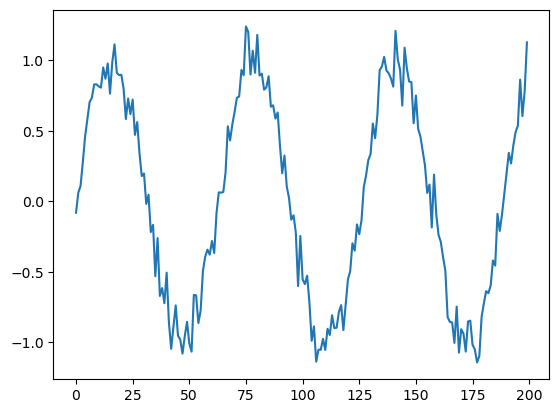

In [13]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1 # generate 200 points with noise

plt.plot(series)
plt.show()

# Goal is to predict this exact sine wave as though it was a time-series data

In [14]:
# build dataset
T = 10 # window size / time steps
X = []
Y = []

for t in range(len(series) - T):
    x = series[t: t+T] # no. data points per window
    X.append(x)
    y = series[t + T] # next day data of window
    Y.append(y)
    
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

print(f"X.shape: {X.shape}, Y.shape: {Y.shape}")

X.shape: (190, 10), Y.shape: (190,)


### Build, compile, train Autoregressive model


In [15]:
i = Input(shape=(T,)) # input layer
x = Dense(1)(i) # Dense layer
model = Model(i, x)

model.compile(
    loss = 'mse',
    optimizer = Adam(lr=.1)
)

# Train on first-half of data
# Validate on second-half
# Cannot train on points that is part of future
r = model.fit(
    X[: -N//2], Y[:-N // 2],
    epochs=800,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/800
3/3 [==============================] - 0s 16ms/step - loss: 0.1334 - val_loss: 0.1365
Epoch 2/800
3/3 [==============================] - 0s 4ms/step - loss: 0.1219 - val_loss: 0.1261
Epoch 3/800
3/3 [==============================] - 0s 4ms/step - loss: 0.1117 - val_loss: 0.1166
Epoch 4/800
3/3 [==============================] - 0s 4ms/step - loss: 0.1018 - val_loss: 0.1080
Epoch 5/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0934 - val_loss: 0.1003
Epoch 6/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0856 - val_loss: 0.0936
Epoch 7/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0795 - val_loss: 0.0876
Epoch 8/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0734 - val_loss: 0.0825
Epoch 9/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0689 - val_loss: 0.0782
Epoch 10/800
3/3 [==============================] - 0s 4ms/step - loss: 0.0649 - val_loss: 0.0745
Epoch 11/800
3/3 [==========

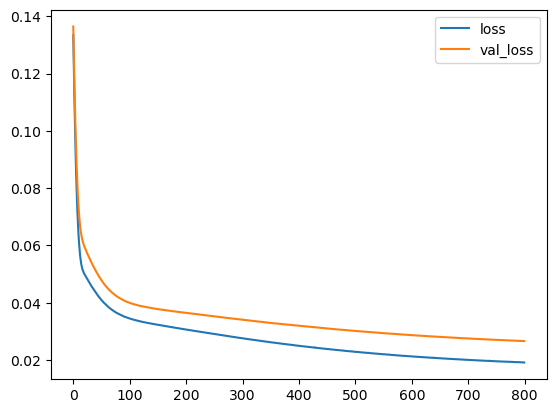

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

### Perform forecasting of sine wave

- need to utilize predicted values as well in forecasting


In [18]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2] # last window of X

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0, 0] # reshape to make it N x K
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1) # shift the numpy array leftwards by 1
    last_x[-1] = p # append latest prediction to use for future prediction

1/1 [==============================] - 0s 7ms/step


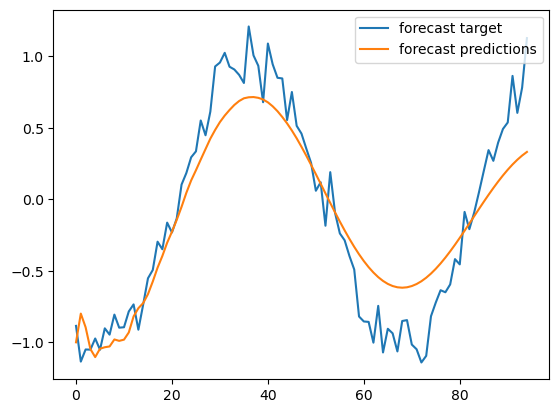

In [19]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()